In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv
/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/349_IM-1697-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/607_IM-2196-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2832_IM-1249-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/699_IM-2263-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1931_IM-0602-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/947_IM-2442-2001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2932_IM-1335-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2303_IM-0882-1001.dcm.png
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/291_IM-1313-2001.dcm.png
/kaggle

# Reading Chest X Ray images

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pandas as pd

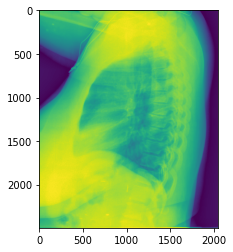

In [2]:
img = mpimg.imread('/kaggle/input/chest-xrays-indiana-university/images/images_normalized/349_IM-1697-2001.dcm.png')
plt.imshow(img)
plt.show()

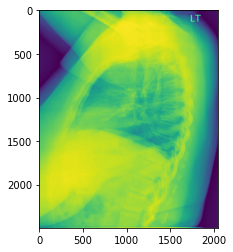

In [3]:

img = mpimg.imread('/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1931_IM-0602-2001.dcm.png')
plt.imshow(img)
plt.show()
     

# Reading xml reports and writing them to cwd for perm storage

In [4]:
cwd = os.getcwd()
xml = tarfile.open('../input/nlmcxr-reports/NLMCXR_reports.tgz')
xml.extractall(cwd+'/xray_reports/')

NameError: name 'os' is not defined

In [ ]:
os.listdir

# Moving the xray (images) data to perm storage

In [39]:
import shutil
shutil.move("../input/chest-xrays-indiana-university", "./xray_iu")

7470

In [84]:
#reading an xml file
with open("./xray_reports/ecgen-radiology/2.xml", 'r') as f:
    print(f.read())
    
    
'''
Observations:
    1) Each XML report has atmost 2 chest xrays associated with it (Frontal and Lateral) given by
     parent image id. Pateint id is reported as well as important labels such as: Comparison, Indication,
     findings and impression.
     
    

'''

<?xml version="1.0" encoding="utf-8"?>
<eCitation>
   <meta type="rr"/>
   <uId id="CXR2"/>
   <pmcId id="2"/>
   <docSource>CXR</docSource>
   <IUXRId id="2"/>
   <licenseType>open-access</licenseType>
   <licenseURL>http://creativecommons.org/licenses/by-nc-nd/4.0/</licenseURL>
   <ccLicense>byncnd</ccLicense>
   <articleURL/>
   <articleDate>2013-08-01</articleDate>
   <articleType>XR</articleType>
   <publisher>Indiana University</publisher>
   <title>Indiana University Chest X-ray Collection</title>
   <note>The data are drawn from multiple hospital systems.</note>
   <specialty>pulmonary diseases</specialty>
   <subset>CXR</subset>
   <MedlineCitation Owner="Indiana University" Status="supplied by publisher">
   
      <Article PubModel="Electronic">
      
         <Journal>
         
            <JournalIssue>
            
               <PubDate>
               
                  <Year>2013</Year>
               
                  <Month>08</Month>
               
            

'\nObservations:\n    1) Each XML report has atmost 2 chest xrays associated with it (Frontal and Lateral) given by\n     parent image id. Pateint id is reported as well as important labels such as: Comparison, Indication,\n     findings and impression.\n     \n    \n\n'

In [61]:
#checking length of the datasets
print('Total Images in data : ', len(os.listdir('./xray_iu/images/images_normalized')))
print('Total Reports in data : ', len(os.listdir('./xray_reports/ecgen-radiology')))

Total Images in data :  7470
Total Reports in data :  3955


In [113]:
#checkcing the reports csv folder
reports_df = pd.read_csv('./xray_iu/indiana_reports.csv')

In [114]:
#looking at first few rows
reports_df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [82]:
#number of observations
reports_df.shape

#number of rows fo reports_df which is 3851 do not match number of reports which is 3955 

(3851, 8)

In [111]:
#checkcing the projections csv folder
project_df = pd.read_csv('./xray_iu/indiana_projections.csv')

project_df.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [87]:
#checking the shape of the dataframe
project_df.shape

(7466, 3)

In [1]:
#counting occurence of uid

data = project_df['uid'].value_counts()

d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2

plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.yscale('log')
plt.ylabel('Counts')
plt.xlabel('Number of images per patients')
plt.show()

# We see that the number of images associated with a patient can vary from 1 to 5!

NameError: name 'project_df' is not defined

In [136]:
#find missing report uids

# last = reports_df['uid'][-1]

ele = 1
rep_mis = []
for i in range(1,reports_df['uid'].iloc[-1]+1):
    
    if i not in list(reports_df['uid']):
        rep_mis.append(i)

In [137]:
#pateint id with missing reports
rep_mis

[109,
 140,
 148,
 156,
 180,
 199,
 213,
 231,
 232,
 265,
 311,
 369,
 381,
 447,
 528,
 566,
 574,
 625,
 678,
 724,
 775,
 789,
 807,
 816,
 823,
 848,
 852,
 873,
 876,
 895,
 898,
 924,
 1068,
 1080,
 1127,
 1132,
 1181,
 1185,
 1186,
 1201,
 1215,
 1227,
 1247,
 1251,
 1298,
 1299,
 1325,
 1486,
 1490,
 1495,
 1507,
 1611,
 1613,
 1628,
 1692,
 1741,
 1749,
 1772,
 1858,
 1862,
 1869,
 1890,
 1917,
 1955,
 1989,
 1996,
 1998,
 2004,
 2009,
 2037,
 2051,
 2057,
 2064,
 2076,
 2101,
 2104,
 2107,
 2182,
 2196,
 2284,
 2309,
 2346,
 2399,
 2429,
 2452,
 2500,
 2508,
 2521,
 2534,
 2556,
 2598,
 2602,
 2603,
 2641,
 2675,
 2678,
 2682,
 2703,
 2707,
 2732,
 2736,
 2757,
 2800,
 2823,
 2834,
 2846,
 2849,
 2853,
 2869,
 2872,
 2875,
 2883,
 2896,
 2900,
 2907,
 2912,
 2913,
 2914,
 2973,
 2987,
 2990,
 3007,
 3035,
 3055,
 3107,
 3161,
 3276,
 3293,
 3295,
 3308,
 3351,
 3397,
 3425,
 3447,
 3463,
 3476,
 3484,
 3554,
 3558,
 3622,
 3710,
 3711,
 3788,
 3800,
 3859,
 3864,
 3920,
 39

In [138]:
#find uids with missing images
img_mis = []
for i in range(1,project_df['uid'].iloc[-1]+1):
    
    if i not in list(project_df['uid']):
        img_mis.append(i)

In [139]:
#pateint id with missing images
img_mis

[109,
 140,
 148,
 156,
 180,
 199,
 213,
 231,
 232,
 265,
 311,
 369,
 381,
 447,
 528,
 566,
 574,
 625,
 678,
 724,
 775,
 789,
 807,
 816,
 823,
 848,
 852,
 873,
 876,
 895,
 898,
 924,
 1068,
 1080,
 1127,
 1132,
 1181,
 1185,
 1186,
 1201,
 1215,
 1227,
 1247,
 1251,
 1298,
 1299,
 1325,
 1486,
 1490,
 1495,
 1507,
 1611,
 1613,
 1628,
 1692,
 1741,
 1749,
 1772,
 1858,
 1862,
 1869,
 1890,
 1917,
 1955,
 1989,
 1996,
 1998,
 2004,
 2009,
 2037,
 2051,
 2057,
 2064,
 2076,
 2101,
 2104,
 2107,
 2182,
 2196,
 2284,
 2309,
 2346,
 2399,
 2429,
 2452,
 2500,
 2508,
 2521,
 2534,
 2556,
 2598,
 2602,
 2603,
 2641,
 2675,
 2678,
 2682,
 2703,
 2707,
 2732,
 2736,
 2757,
 2800,
 2823,
 2834,
 2846,
 2849,
 2853,
 2869,
 2872,
 2875,
 2883,
 2896,
 2900,
 2907,
 2912,
 2913,
 2914,
 2973,
 2987,
 2990,
 3007,
 3035,
 3055,
 3107,
 3161,
 3276,
 3293,
 3295,
 3308,
 3351,
 3397,
 3425,
 3447,
 3463,
 3476,
 3484,
 3554,
 3558,
 3622,
 3710,
 3711,
 3788,
 3800,
 3859,
 3864,
 3920,
 39

In [145]:
print(len(rep_mis))
print(len(img_mis))

#check if the reports missing and images missing pateints are the same
print(f'check if the reports missing and images missing pateints are the same: {rep_mis == img_mis}')

148
148
check if the reports missing and images missing pateints are the same: True


In [83]:
os.listdir('./xray_iu')

['indiana_reports.csv', 'indiana_projections.csv', 'images']

In [130]:
list(reports_df['uid'])[-1]

3999